# Milestone 2

In [73]:
### imports

import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import statistics as stat

## Task 1: Analysis Pipeline

Central question for data: What is the relationship between having children and increased medical costs. How does this relationship change as the number of children changes?

From this question, the pertinent information is: cost, children.

### Loading Data

In [74]:
data = pd.read_csv('insurance.csv')
pd.DataFrame.head(data)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


File type: Comma Seperated Values (csv)

Delimiters: commas

Skip columns? not neccessary

Skip rows?

In [75]:
# checking for null rows in data frame
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

No null values in csv therfore skip rows not neccessary.

### Clean Data

No missing data. 

Considering the central question, only the columns of children and charges are neccessary.
In order to keep some intergrity in our data we will look at non-smokers in the age range of 25 and up. We are eliminating people under 25 on the asumption that people under 25 are less likely to have children and will therefore skew the data. Smokers are eliminated because The relationship between smoking and number of children is not known and we do not want to effect our data with unknown relationships. We will perform analysis for both sexes.

In [76]:
# removing superfluous columns
del data['bmi']
del data['region']

# removing smokers
data = data[data['smoker'] == 'no']

# selecting for age > 25
data = data[data['age'] > 25]

pd.DataFrame.head(data)



,age,sex,children,smoker,charges
2,28,male,3,no,4449.46200
3,33,male,0,no,21984.47061
4,32,male,0,no,3866.85520
5,31,female,0,no,3756.62160
6,46,female,1,no,8240.58960


checking for 'incorrect' data.

lets check max number of children to make sure theres no outliers that will squew the data

In [77]:
print(max(data['children']))

5


5 is a realistic number.

Now well do the same for charges.


In [78]:
print(max(data["charges"]))

36910.60803


We get roughly $37 thousand. Again this seems realistic.

In [85]:
len(data)

823

We have cleaned our data and we still have over 800 rows of good clean data.

### Process Data

Lets take another look at outliers. First lets take a quick look at the dataset.

/Users/seanripley/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set(**kwargs)


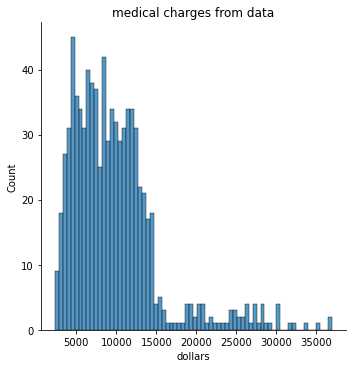

In [82]:
# Graphic of charges to identify outliers
sns.displot(data = data ,  palette = "colorblind" , x = "charges" , bins = 70).set(
            Title = "medical charges from data" , 
            xlabel = 'dollars')

The data seems to be weighted alot more to around the 10k range but the data up to 36k still looks fair and valid.

/Users/seanripley/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set(**kwargs)


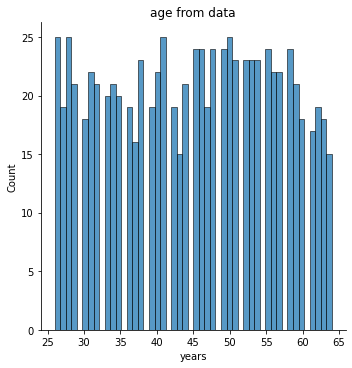

In [81]:
# graphic of age
sns.displot(data = data ,  palette = "colorblind" , x = "age" , bins = 50).set(
            Title = "age from data" , 
            xlabel = 'years')

Looks like we have a good even distribution of age.

No unacceptable outliers.

In [89]:
# making our smokers column numerical

data = data.replace(to_replace = 'yes' , value = 1)
data = data.replace(to_replace = 'no', value = 0)

pd.DataFrame.head(data)

,age,sex,children,smoker,charges
2,28,male,3,0,4449.46200
3,33,male,0,0,21984.47061
4,32,male,0,0,3866.85520
5,31,female,0,0,3756.62160
6,46,female,1,0,8240.58960


No other data processing to do.



### Wrangle Data

In [90]:
print(data)

      age     sex  children  smoker      charges
2      28    male         3       0   4449.46200
3      33    male         0       0  21984.47061
4      32    male         0       0   3866.85520
5      31  female         0       0   3756.62160
6      46  female         1       0   8240.58960
...   ...     ...       ...     ...          ...
1327   51    male         1       0   9377.90470
1329   52    male         2       0  10325.20600
1330   57  female         2       0  12629.16560
1332   52  female         3       0  11411.68500
1333   50    male         3       0  10600.54830

[823 rows x 5 columns]


Due to the deletion and changing of data we need to re index the rows.

In [105]:
# reindexing data
data = data.reset_index()

del data['index']

print(data)

     age     sex  children  smoker      charges
0     28    male         3       0   4449.46200
1     33    male         0       0  21984.47061
2     32    male         0       0   3866.85520
3     31  female         0       0   3756.62160
4     46  female         1       0   8240.58960
..   ...     ...       ...     ...          ...
818   51    male         1       0   9377.90470
819   52    male         2       0  10325.20600
820   57  female         2       0  12629.16560
821   52  female         3       0  11411.68500
822   50    male         3       0  10600.54830

[823 rows x 5 columns]


Dataset is now indexed properly.
